<a href="https://colab.research.google.com/github/Gcango/Analise_Exploratorio_dos_Dados_da_TopSeles/blob/main/Analise_Exploratoria_TopSeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este é um desafio Adaptado, cujo objectivo é a exploração dos dados com base nos parametros de analise de dados.

Problema: ToSeles é uma empresa de vendas, pretende fazer uma analise exploratória dos seus dados no periodo de 2020 e 2021. Para tal empreitada o grupo de gestores da TOPSELES definiu algumas questões encontradas no desenrolar deste documento.

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [280]:
dados = pd.read_csv("/content/sales.csv", low_memory=False)

In [281]:
dados.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [282]:
dados.tail(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
286387,100562365,2021-09-30,paid,905179.0,APPCHA5AF14939B8F8A,2.0,4419.9,4419.9,0.0,4419.9,Appliances,Easypay,Valid,115323.0,2021,Sep-2021,967309,Prof.,Brady,K,Latham,M,51.0,"Latham, Brady",brady.latham@gmail.com,3/21/2007,613-87-0361,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,2021-09-30,cod,905191.0,MEFCOT5A8D1E973B886,2.0,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,115324.0,2021,Sep-2021,335358,Prof.,Bennie,M,Brunetti,M,52.0,"Brunetti, Bennie",bennie.brunetti@gmail.com,10/24/2011,101-02-1040,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,2021-09-30,cod,905200.0,WOFVAL59D5EA84167F9-M,2.0,40.0,40.0,0.0,40.0,Women's Fashion,cod,Valid,115325.0,2021,Sep-2021,675384,Mrs.,Francesca,N,Giusti,F,38.0,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,2021-09-30,cod,905202.0,WOFNIG5B4D7EB0E9FDD-L,2.0,49.9,49.9,0.0,49.9,Women's Fashion,cod,Valid,115325.0,2021,Sep-2021,675384,Mrs.,Francesca,N,Giusti,F,38.0,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286391,100562386,2021-09-30,processing,905205.0,MATHUA5AF70A7D1E50A,2.0,3559.9,3559.9,0.0,3559.9,Mobiles & Tablets,bankalfalah,Gross,115326.0,2021,Sep-2021,489455,Mr.,Rolf,E,Schlosser,M,28.0,"Schlosser, Rolf",rolf.schlosser@comcast.net,1/28/2015,320-11-8748,423-276-2699,Knoxville,Knox,Knoxville,TN,37920,South,reschlosser,0.0


In [283]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [284]:
print(f" Esta Base de dados contem {dados.shape[0]} linhas e {dados.shape[1]} ")

 Esta Base de dados contem 286392 linhas e 36 


In [285]:
#Exibição das colunas por completo
pd.set_option('display.max_columns', None)
dados.sample(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
16851,100366343,2020-11-12,canceled,593607.0,BAGKEN59BA659A86AA4,4.0,400.0,1200.0,360.00,840.00,Beauty & Grooming,Payaxis,Gross,24696.0,2020,Nov-2020,414232,Hon.,Eleanora,I,Culler,F,20.0,"Culler, Eleanora",eleanora.culler@gmail.com,3/7/2003,371-37-3236,216-426-4497,Columbus,Franklin,Columbus,OH,43211,Midwest,eiculler,30.000000
53677,100368069,2020-11-15,received,596360.0,MEFBUY59B7C3FDDB129-43,3.0,63.0,126.0,0.00,126.00,Men's Fashion,cod,Valid,9571.0,2020,Nov-2020,441758,Ms.,Junita,J,Bloomfield,F,20.0,"Bloomfield, Junita",junita.bloomfield@yahoo.com,2/6/2003,135-25-6066,225-877-6162,Dupont,Avoyelles,Dupont,LA,71329,South,jjbloomfield,0.000000
72045,100385775,2020-12-20,complete,626075.0,APPBIN59F97224AEF72,2.0,134.8,134.8,20.00,114.80,Appliances,easypay_voucher,Net,66120.0,2020,Dec-2020,562352,Ms.,Francisco,M,Labarre,F,61.0,"Labarre, Francisco",francisco.labarre@hotmail.co.uk,6/12/2010,497-29-6639,319-433-1089,Randall,Hamilton,Randall,IA,50231,Midwest,fmlabarre,14.836795
208665,100478879,2021-04-16,order_refunded,783228.0,MATSAM5A7D8FE18BDAD,2.0,9583.3,9583.3,958.33,8624.97,Mobiles & Tablets,Payaxis,Valid,92685.0,2021,Apr-2021,645886,Ms.,Ileana,A,Merritt,F,72.0,"Merritt, Ileana",ileana.merritt@hotmail.com,3/26/2017,554-99-3148,215-521-7880,Adamsburg,Westmoreland,Adamsburg,PA,15611,Northeast,iamerritt,10.000000
223291,100541245,2021-07-13,canceled,870133.0,MEFAYB5AEAE484C6049-Free Size,2.0,44.9,44.9,0.00,44.90,Men's Fashion,Easypay,Gross,96927.0,2021,Jul-2021,195394,Mrs.,Liz,U,Melo,F,18.0,"Melo, Liz",liz.melo@ibm.com,5/17/2015,633-31-3682,303-768-6337,Sedgwick,Sedgwick,Sedgwick,CO,80749,West,lumelo,0.000000


In [286]:
dados.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [287]:
#1) - Confirma o Periodo da Base de dados da TOPSELES

In [288]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [289]:

print(f" Esta Base de dados possui dados dos anos de {dados.year.unique()[0]} e {dados.year.unique()[1]}")

 Esta Base de dados possui dados dos anos de 2020 e 2021


In [290]:
#2) - Em que data específica a TOPSELES começou o processo de vendas e qual foi a sua Faturação?

In [291]:
data_inicio = dados.groupby(['order_date'])['total'].sum()
data_inicio

order_date
2020-10-01    219672.11100
2020-10-02     78931.49000
2020-10-03    254652.23035
2020-10-04    105074.33500
2020-10-05    124694.49800
                  ...     
2021-09-26    122478.87750
2021-09-27    263124.66000
2021-09-28    307490.84000
2021-09-29    190946.18200
2021-09-30    184022.22500
Name: total, Length: 365, dtype: float64

In [292]:
print(f" A TOPSELES começou o seu processo  de vendas em  {data_inicio.index[0]} \n e extima-se que na sua primeira venda faturou em torno de {data_inicio[0]} USD")

 A TOPSELES começou o seu processo  de vendas em  2020-10-01 
 e extima-se que na sua primeira venda faturou em torno de 219672.111 USD


In [293]:
#3) - Quais foram os periodos (meses e anos) em que houve vendas?

In [294]:
period_vendas = dados.groupby(['year', 'month'])['total'].sum()
print(f" Os periodos de vendas na TOPSELES são abaixos descriminados: ")
print(period_vendas)

 Os periodos de vendas na TOPSELES são abaixos descriminados: 
year  month   
2020  Dec-2020    5.766699e+07
      Nov-2020    1.148501e+07
      Oct-2020    5.299812e+06
2021  Apr-2021    3.669856e+07
      Aug-2021    2.052181e+07
      Feb-2021    4.404198e+06
      Jan-2021    7.141194e+06
      Jul-2021    1.903746e+07
      Jun-2021    2.464510e+07
      Mar-2021    2.516152e+07
      May-2021    1.005662e+07
      Sep-2021    1.153192e+07
Name: total, dtype: float64


In [295]:
#4) - No geral quantos dias de faturamento foram?

In [296]:
print(f"No geral, a TOPSALES teve {dados['order_date'].nunique()} dias de faturamento ")

No geral, a TOPSALES teve 365 dias de faturamento 


In [297]:
#5) - Quais são os clientes cadastrados na Base de Dados de acordo com os seus prefixos?

In [298]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [299]:
prefixo = dados['Name Prefix'].unique()[0:7]
print(f"De acordo com os prefixos, os clientes da TOPSALES são: \n{prefixo}")
print(f"Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade")

De acordo com os prefixos, os clientes da TOPSALES são: 
['Drs.' 'Prof.' 'Mr.' 'Hon.' 'Ms.' 'Mrs.' 'Dr.']
Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade


In [300]:
#6) - Quais produtos foram facilmente encontrar a vendas?

In [301]:
prodts = dados.groupby(['category'])['total'].count().sort_values(ascending=False)
prodts

category
Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: total, dtype: int64

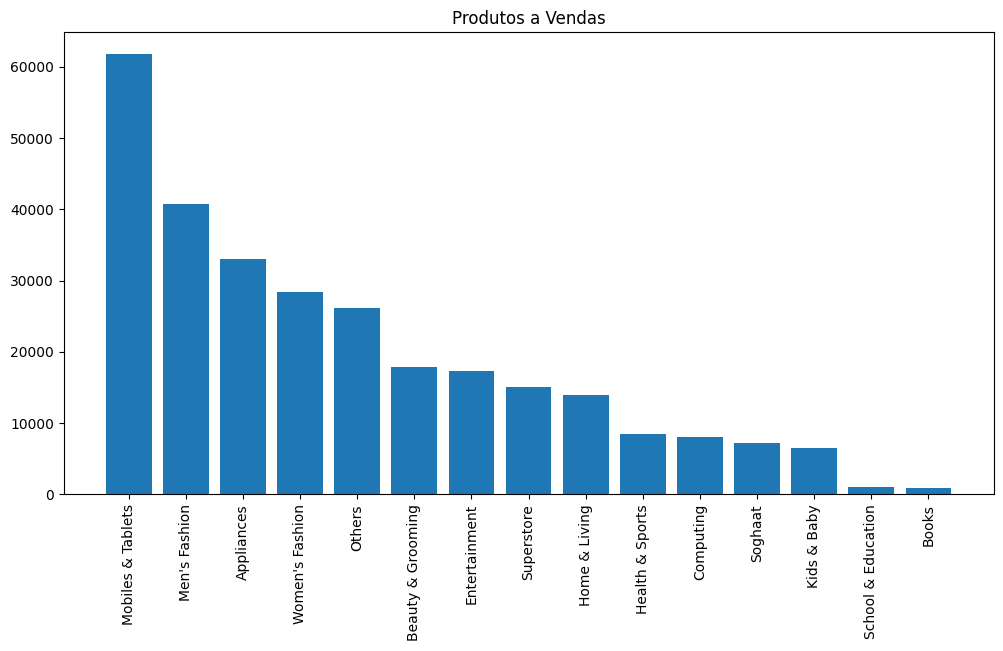

In [302]:
plt.figure(figsize=(12,6))
plt.bar(prodts.index, prodts.values)
plt.xticks(rotation=90)
plt.title('Produtos a Vendas')
plt.show()

In [303]:
print(f'Se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: \n {prodts.index[0:5]}')

Se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: 
 Index(['Mobiles & Tablets', 'Men's Fashion', 'Appliances', 'Women's Fashion',
       'Others'],
      dtype='object', name='category')


In [304]:
#7) - Qual foi o movimento financeiro dos produtos são mais vendidos?

In [305]:
prod_vendidos = dados.groupby(['category'])['total'].sum().reset_index().sort_values(by='total', ascending=False)
prod_vendidos

,category,total
9,Mobiles & Tablets,1.301120e+08
0,Appliances,3.006084e+07
4,Entertainment,2.713843e+07
10,Others,1.556433e+07
3,Computing,9.362343e+06
14,Women's Fashion,6.649842e+06
8,Men's Fashion,4.820147e+06
13,Superstore,2.886907e+06
1,Beauty & Grooming,2.644748e+06
6,Home & Living,1.810582e+06


In [306]:
px.bar(prod_vendidos, x='category', y='total')

In [307]:
print(f' De igual modo, se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: \n {prod_vendidos.category[0:5]}')

 De igual modo, se consideramos um top 5 dos produtos mais vendido, podemos afirmar que são: 
 9     Mobiles & Tablets
0            Appliances
4         Entertainment
10               Others
3             Computing
Name: category, dtype: object


In [308]:
#8) - Como é que esses clientes estão distribuidos por genero?

In [309]:
genero = dados['Gender'].value_counts()
print(f"Quanto ao genero são:{genero[0]} Homens e {genero[1]} Mulheres ")
data1 = genero[0]
data2 = genero[1]
dif = data1 - data2

Quanto ao genero são:146184 Homens e 140208 Mulheres 


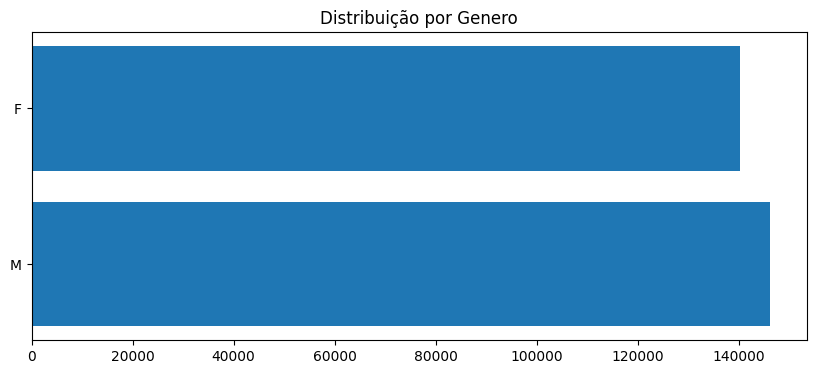

In [310]:
plt.figure(figsize=(10,4))
plt.barh(genero.index, genero.values)
plt.title('Distribuição por Genero')
plt.show()

In [311]:
print(f" A diferença numeral entre Homens e Mulheres cadastrados na Base de dados é de {dif}")

 A diferença numeral entre Homens e Mulheres cadastrados na Base de dados é de 5976


In [312]:
#9) - Como os Generos se refletem na compra da TOPSELES

In [313]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [314]:
genero = dados.groupby(['Gender','category'])['total'].sum()
feminino = genero.iloc[0:15]
feminino

Gender  category          
F       Appliances            1.502506e+07
        Beauty & Grooming     1.272931e+06
        Books                 1.303474e+04
        Computing             4.305780e+06
        Entertainment         1.344521e+07
        Health & Sports       4.162642e+05
        Home & Living         9.929124e+05
        Kids & Baby           4.242669e+05
        Men's Fashion         2.277410e+06
        Mobiles & Tablets     6.626686e+07
        Others                7.374591e+06
        School & Education    5.100410e+04
        Soghaat               2.826469e+05
        Superstore            1.364015e+06
        Women's Fashion       3.140816e+06
Name: total, dtype: float64

In [315]:
total_fem = feminino.sum()
total_fem

116652808.05874002

In [316]:
masculino = genero.iloc[15:]
masculino

Gender  category          
M       Appliances            1.503577e+07
        Beauty & Grooming     1.371817e+06
        Books                 1.938221e+04
        Computing             5.056563e+06
        Entertainment         1.369322e+07
        Health & Sports       6.036934e+05
        Home & Living         8.176699e+05
        Kids & Baby           4.319464e+05
        Men's Fashion         2.542736e+06
        Mobiles & Tablets     6.384513e+07
        Others                8.189744e+06
        School & Education    6.373602e+04
        Soghaat               2.940530e+05
        Superstore            1.522892e+06
        Women's Fashion       3.509025e+06
Name: total, dtype: float64

In [317]:
total_masc = masculino.sum()
total_masc

116997386.37335001

In [318]:
dif_gen = total_fem - total_masc
dif_gen

-344578.3146099895

In [319]:
print(f" O total de compras efectuado pelas Mulheres é de {total_fem} USD ")
print(f" O total de compras efectuado pelos Homens é de {total_masc} USD ")
print(f" As Mulheres gastaram mais {dif_gen} USD em relação aos Homens ")
print(f" O valor máximo gasto pelas Muheres foi de {feminino.max()} USD e o mínimo de {feminino.min()} USD ")
print(f" Quanto aos valores dos Homens, o máximo gasto foi de {masculino.max()} USD e o mínimo de {masculino.min()} USD ")

 O total de compras efectuado pelas Mulheres é de 116652808.05874002 USD 
 O total de compras efectuado pelos Homens é de 116997386.37335001 USD 
 As Mulheres gastaram mais -344578.3146099895 USD em relação aos Homens 
 O valor máximo gasto pelas Muheres foi de 66266859.13746 USD e o mínimo de 13034.74418 USD 
 Quanto aos valores dos Homens, o máximo gasto foi de 63845134.61495 USD e o mínimo de 19382.208 USD 


In [320]:
print(f" Olhando por cada categoria podemos ter o seguinte: ")

 Olhando por cada categoria podemos ter o seguinte: 


In [321]:
geral = dados.groupby(['Gender','category'])['total'].sum().reset_index().sort_values(by=['Gender','total'],ascending=False)
geral.T

,24,15,19,25,18,29,23,28,16,21,20,22,27,26,17,9,0,4,10,3,14,8,13,1,6,7,5,12,11,2
Gender,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F
category,Mobiles & Tablets,Appliances,Entertainment,Others,Computing,Women's Fashion,Men's Fashion,Superstore,Beauty & Grooming,Home & Living,Health & Sports,Kids & Baby,Soghaat,School & Education,Books,Mobiles & Tablets,Appliances,Entertainment,Others,Computing,Women's Fashion,Men's Fashion,Superstore,Beauty & Grooming,Home & Living,Kids & Baby,Health & Sports,Soghaat,School & Education,Books
total,63845134.61495,15035770.93858,13693223.29256,8189743.517,5056562.88588,3509025.22974,2542736.13744,1522891.96864,1371816.81364,817669.94661,603693.38209,431946.37568,294053.04174,63736.0208,19382.208,66266859.13746,15025064.63512,13445211.52944,7374590.83798,4305780.4531,3140816.39539,2277410.46582,1364014.64452,1272930.75804,992912.36537,424266.90097,416264.19294,282646.90106,51004.09735,13034.74418


In [322]:
#10) - Como estão distribuidos a questão de idade dos clientes?

In [323]:
idades = dados['age'].value_counts(ascending=False)#.reset_index()
idades.index.sort_values()

Float64Index([18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
              29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
              40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0,
              51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0,
              62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0,
              73.0, 74.0, 75.0],
             dtype='float64')

In [324]:
idades = dados['age'].value_counts(ascending=False).reset_index()
idades.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
index,50.0,39.0,52.0,36.0,64.0,18.0,40.0,25.0,69.0,31.0,28.0,73.0,21.0,51.0,59.0,35.0,63.0,62.0,67.0,27.0,70.0,54.0,60.0,24.0,33.0,45.0,49.0,68.0,19.0,56.0,30.0,38.0,65.0,44.0,32.0,72.0,55.0,75.0,66.0,29.0,47.0,53.0,61.0,22.0,58.0,43.0,71.0,46.0,37.0,20.0,57.0,34.0,41.0,23.0,48.0,74.0,42.0,26.0
age,7293.0,6376.0,5974.0,5895.0,5754.0,5708.0,5510.0,5423.0,5399.0,5397.0,5336.0,5283.0,5219.0,5177.0,5174.0,5122.0,5121.0,5104.0,5072.0,5044.0,5042.0,5035.0,5025.0,5011.0,4995.0,4977.0,4931.0,4919.0,4917.0,4872.0,4852.0,4822.0,4821.0,4815.0,4787.0,4735.0,4694.0,4685.0,4682.0,4676.0,4605.0,4604.0,4593.0,4588.0,4551.0,4532.0,4501.0,4419.0,4389.0,4383.0,4362.0,4244.0,4243.0,4193.0,4154.0,4153.0,4131.0,4073.0


In [325]:
#11) - Como podemos entender o estado das vendas dos produtos da TOPSELES? Temos como provar a relação com Order_id?

In [326]:
graf_estado = dados['status'].value_counts()
graf_estado

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: status, dtype: int64

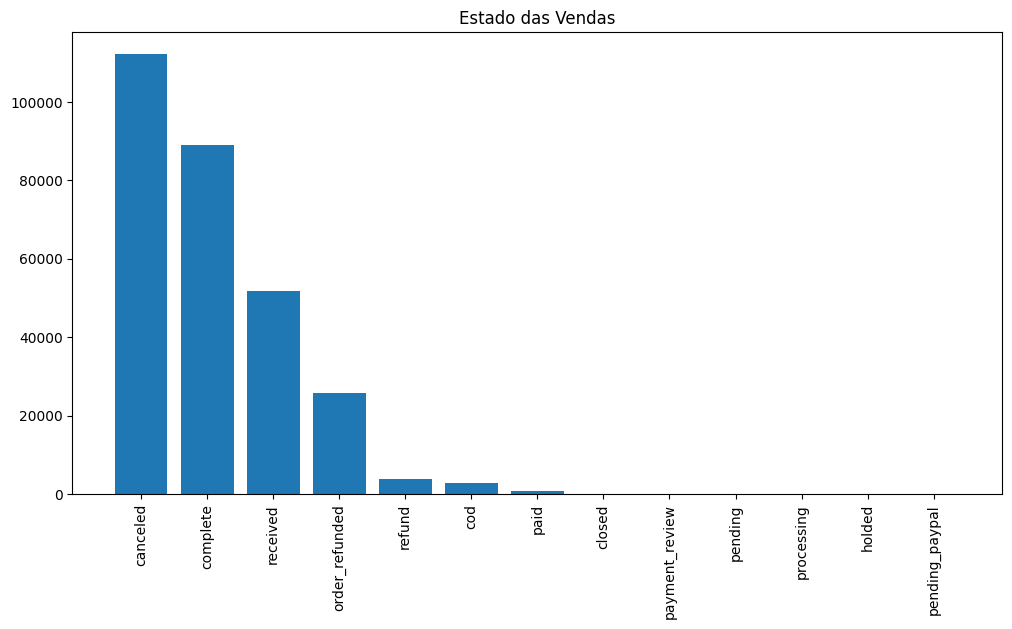

In [327]:
plt.figure(figsize=(12,6))
plt.bar(graf_estado.index, graf_estado.values)
plt.xticks(rotation=90)
plt.title('Estado das Vendas')
plt.show()

In [328]:
print(" O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:")
print(f" Staus {graf_estado.index[0]}  {graf_estado[0]}")
print(f" Staus {graf_estado.index[1]}  {graf_estado[1]}")
print(f" Staus {graf_estado.index[2]}  {graf_estado[2]}")
print(f" Staus {graf_estado.index[3]}  {graf_estado[3]}")
print(f" Staus {graf_estado.index[4]}  {graf_estado[4]}")
print(f" Staus {graf_estado.index[5]}  {graf_estado[5]}")
print(f" Staus {graf_estado.index[6]}  {graf_estado[6]}")


 O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:
 Staus canceled  112166
 Staus complete  88968
 Staus received  51775
 Staus order_refunded  25713
 Staus refund  3820
 Staus cod  2851
 Staus paid  756


In [329]:
print("Em relação a Orde_id eles estão de igual modo distribuidos assim: ")

Em relação a Orde_id eles estão de igual modo distribuidos assim: 


In [330]:
dados.groupby('status')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)

,status,order_id
0,canceled,112166
3,complete,88968
11,received,51775
5,order_refunded,25713
12,refund,3820
2,cod,2851
6,paid,756
1,closed,176
7,payment_review,57
8,pending,48


In [331]:
#12) - É possivel justificar a forma de pagamento para os STATUS mais predominantes?

In [332]:
#-> Considerando a order_id = cancelada. Como são efectuados os pagamentos?
form_pay = dados.query('status == "canceled" ')['payment_method'].value_counts()
form_pay


Easypay              42063
Payaxis              17327
bankalfalah          16179
easypay_voucher      11267
cod                   8854
Easypay_MA            7683
jazzwallet            4193
jazzvoucher           3215
apg                   1361
customercredit          21
mcblite                  2
financesettlement        1
Name: payment_method, dtype: int64

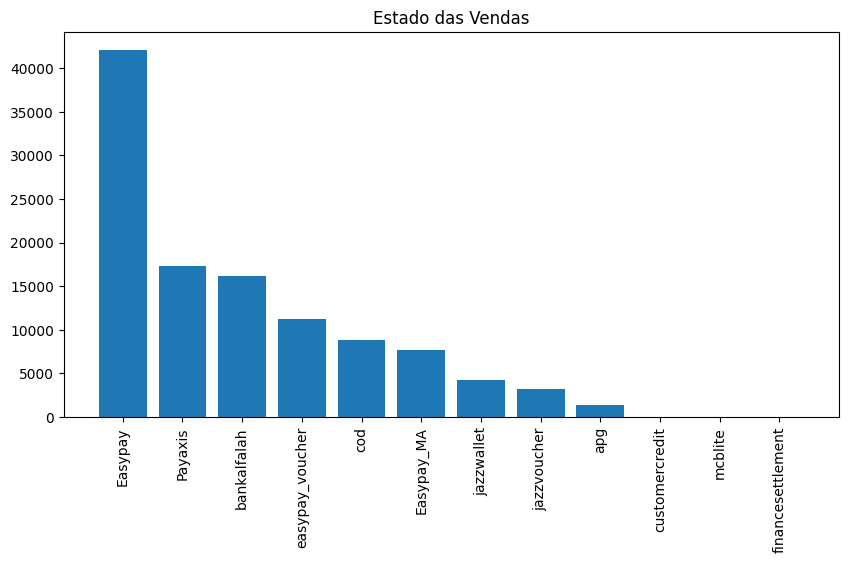

In [333]:
plt.figure(figsize=(10,5))
plt.bar(form_pay.index, form_pay.values)
plt.xticks(rotation=90)
plt.title('Estado das Vendas')
plt.show()

In [334]:
#-> Considerando a order_id = Completa. Como são efectuados os pagamentos?
form_pay02 = dados.query('status == "complete" ')['payment_method'].value_counts()
form_pay02

cod                41607
Easypay            17312
easypay_voucher    15772
Payaxis             7964
Easypay_MA          2485
customercredit      1411
jazzvoucher          876
jazzwallet           837
bankalfalah          586
mcblite               86
apg                   27
cashatdoorstep         5
Name: payment_method, dtype: int64

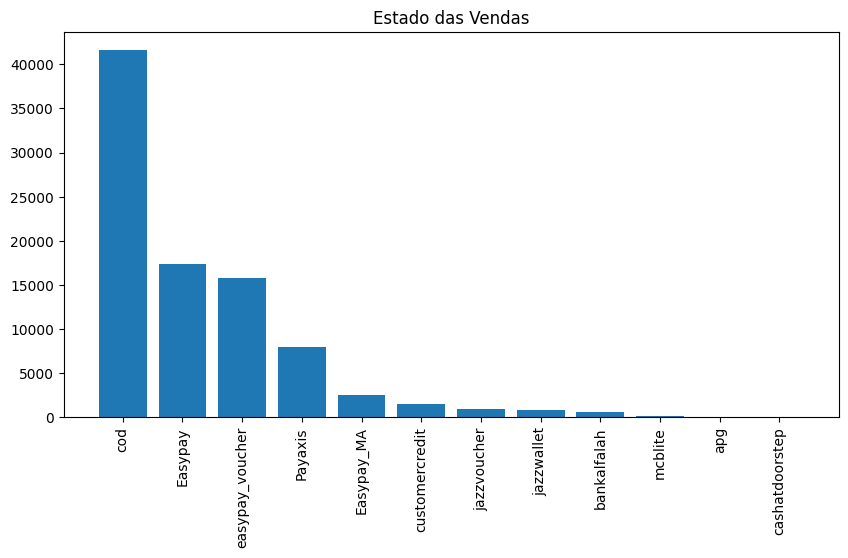

In [335]:
plt.figure(figsize=(10,5))
plt.bar(form_pay02.index, form_pay02.values)
plt.xticks(rotation=90)
plt.title('Estado das Vendas')
plt.show()

In [336]:
print(f" No status de Compra, o metodo de pagamento Predominante é o Payaxis. \n É importante verificar-se este tipo de pagamento ")
print(f" Já a maior parte dos clientes que recorrem ao pagamento do COD, têm mais \n chances de ter as compras Completadas ")

 No status de Compra, o metodo de pagamento Predominante é o Payaxis. 
 É importante verificar-se este tipo de pagamento 
 Já a maior parte dos clientes que recorrem ao pagamento do COD, têm mais 
 chances de ter as compras Completadas 


In [337]:
#13) - É possivel verificar os produtos que mais se cancelam?

In [338]:
dados.query('status == "canceled" ').groupby(['category', 'sku'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(10)

,category,sku,order_id
13584,Mobiles & Tablets,MATSAM59DB75ADB2F80,882
1193,Appliances,APPNAT5A0A01860CE92,449
13732,Mobiles & Tablets,MATSAM5A7463EE3C1A5,448
13573,Mobiles & Tablets,MATSAM59DB757FB47A2,445
13912,Mobiles & Tablets,MATSAM5B10F7E2AC8C1,398
14557,Others,OTHPCB5A7D8A0DA56C6,396
14660,Others,OTHPCB5ABB207927CA9,391
5006,Entertainment,ENTNOB5A4633C950FAD,385
14650,Others,OTHPCB5ABB2073BDF0C,368
4819,Entertainment,ENTECO5A7FE80D6C830,365


In [340]:
#14) - Como esta a situação dos Reembolsos?

In [342]:
dados.query('status == "order_refunded" ').groupby(['category', 'sku'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(10)

,category,sku,order_id
9756,Mobiles & Tablets,MATSAM59DB757FB47A2,474
10402,Others,OTHOTH5A0945D0A72F4,158
6809,Men's Fashion,MEFKAR5A7C138CE9EBD-M,55
2998,Entertainment,ENTHAI59BA8F0AA2B18,55
658,Appliances,APPNAT5A0A01860CE92,53
9710,Mobiles & Tablets,MATSAM59B7E8D3E0A3E,52
1950,Beauty & Grooming,BAGPRI5A327299C4F97,47
3719,Health & Sports,HASQAR5A7449994BBA7,47
6814,Men's Fashion,MEFKAR5A7C1393107CA-M,45
9091,Mobiles & Tablets,MATIDR59BA5107902DF,43


In [ ]:
#15) - Quais regiões comprou mais produtos?

In [345]:
graf_region = dados.groupby('Region')['total'].sum().reset_index().sort_values(by='total', ascending=False)
graf_region

,Region,total
2,South,8.964785e+07
0,Midwest,6.292063e+07
3,West,4.111747e+07
1,Northeast,3.996425e+07


In [346]:
px.bar(graf_region, x='Region', y='total')

In [ ]:
#16) - Faça uma analise acerca dos descontos dos produtos vendidos

In [348]:
disc_graf = dados.groupby('category')['Discount_Percent'].mean().reset_index().sort_values(by='Discount_Percent', ascending=False)
disc_graf

,category,Discount_Percent
4,Entertainment,9.735056
13,Superstore,9.401311
0,Appliances,9.360799
3,Computing,8.783462
9,Mobiles & Tablets,8.101317
1,Beauty & Grooming,5.503726
14,Women's Fashion,5.052338
6,Home & Living,4.504001
12,Soghaat,4.488234
8,Men's Fashion,3.666560


In [349]:
px.bar(disc_graf, x='category', y='Discount_Percent')

In [350]:
print("Os produtos de Entretendimento têm uma % maior de desconto em relação aos demais")

Os produtos de Entretendimento têm uma % maior de desconto em relação aos demais
